In [1]:
# Official packages
import os
import copy
import math

# Third-party packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

# In-house packages
from BrukerSpSpEpi import BrukerSpSpEpiExp


In [2]:
def _normalize(array):
    return array/np.max(array)

def view_epi_slice_3d(spsp_epi_exp):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    #X, Y, Z = axes3d.get_test_data(0.01)

    _x = np.arange(0, spsp_epi_exp._exp_data_dim_dict['dim_r_image_ro'], 1 )
    _y = np.arange(0, spsp_epi_exp._exp_data_dim_dict['dim_r_image_ph'], 1)

    X, Y = np.meshgrid(_x, _y)
    Z = _normalize(spsp_epi_exp.r_space_data['Mag'])

    # Plot the 3D surface
    ax.plot_surface(X, Y, Z, cmap=cm.RdGy_r, linewidth=0.5, antialiased=False,alpha=0.25)

    # Plot projections of the contours for each dimension.  By choosing offsets
    # that match the appropriate axes limits, the projected contours will sit on
    # the 'walls' of the graph
    cset = ax.contour(X, Y, Z, zdir='z', offset=-.1, cmap=cm.seismic, alpha=0.99)

    x = np.arange(0, spsp_epi_exp._exp_data_dim_dict['dim_r_image_ro'], 1 )
    y = _normalize(spsp_epi_exp.magnitude_proj['ph'])
    ax.plot(x, y, zs=0, zdir='x', label='curve in (x, y)')

    x = np.arange(0, spsp_epi_exp._exp_data_dim_dict['dim_r_image_ph'], 1 )
    y = _normalize(spsp_epi_exp.magnitude_proj['ro'])
    ax.plot(x, y, zs=120, zdir='y', label='curve in (x, y)')

    ax.set_xlim(-0, 120)
    ax.set_ylim(-0, 120)
    ax.set_zlim(-.1, 1)

    ax.set_xlabel('Ph-Direction')
    ax.set_ylabel('RO-Direction')
    ax.set_zlabel('Normalized Intensity [1]')

    plt.show()


In [3]:
calib_exp_dir = "../20230305_163320_AgroseCylinder2_1_1/21"
        
spsp_epi_calib = BrukerSpSpEpiExp(calib_exp_dir)


spsp_epi_calib = BrukerSpSpEpiExp(calib_exp_dir, does_reconstruction=True)


print(spsp_epi_calib.post_processing_params['has_double_sampling'])
print(np.shape(spsp_epi_calib.dataset['DATA']['k_space']['Pos']))


True
(1, 80, 120)


In [4]:
overflow_exp_dir = "../LTL610_014_HP_spspEPI_6.0.1//20"

spsp_epi_overflow = BrukerSpSpEpiExp(overflow_exp_dir)

In [5]:
a = range(120)

a= np.reshape(a,(4,3,-1))
print(a, "\n"*3)

a= np.swapaxes(a, axis1=0, axis2=1)
print(a)



[[[  0   1   2   3   4   5   6   7   8   9]
  [ 10  11  12  13  14  15  16  17  18  19]
  [ 20  21  22  23  24  25  26  27  28  29]]

 [[ 30  31  32  33  34  35  36  37  38  39]
  [ 40  41  42  43  44  45  46  47  48  49]
  [ 50  51  52  53  54  55  56  57  58  59]]

 [[ 60  61  62  63  64  65  66  67  68  69]
  [ 70  71  72  73  74  75  76  77  78  79]
  [ 80  81  82  83  84  85  86  87  88  89]]

 [[ 90  91  92  93  94  95  96  97  98  99]
  [100 101 102 103 104 105 106 107 108 109]
  [110 111 112 113 114 115 116 117 118 119]]] 



[[[  0   1   2   3   4   5   6   7   8   9]
  [ 30  31  32  33  34  35  36  37  38  39]
  [ 60  61  62  63  64  65  66  67  68  69]
  [ 90  91  92  93  94  95  96  97  98  99]]

 [[ 10  11  12  13  14  15  16  17  18  19]
  [ 40  41  42  43  44  45  46  47  48  49]
  [ 70  71  72  73  74  75  76  77  78  79]
  [100 101 102 103 104 105 106 107 108 109]]

 [[ 20  21  22  23  24  25  26  27  28  29]
  [ 50  51  52  53  54  55  56  57  58  59]
  [ 80  81  82  

In [6]:
spsp_epi_overflow = BrukerSpSpEpiExp(overflow_exp_dir, does_reconstruction=True, does_zerofill=True)


print(np.shape(spsp_epi_overflow.dataset['DATA']['k_space']['Pos']))

(54, 16, 16)


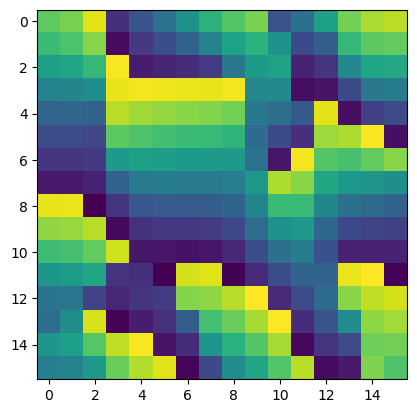

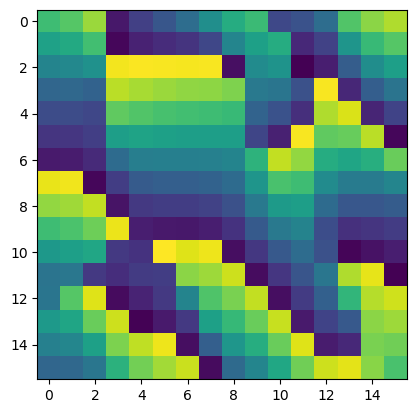

In [7]:
plt.figure()
plt.imshow(np.angle(spsp_epi_overflow.dataset['DATA']['k_space']['Pos'][2]))
plt.show()
plt.figure()
plt.imshow(np.angle(spsp_epi_overflow.dataset['DATA']['k_space']['Neg'][2]))
plt.show()

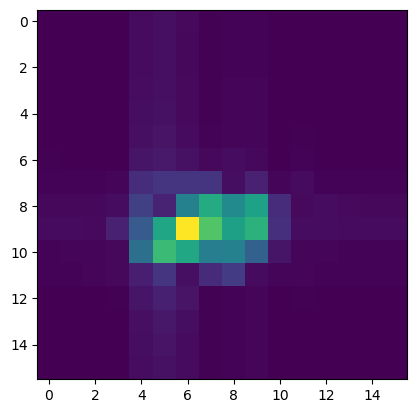

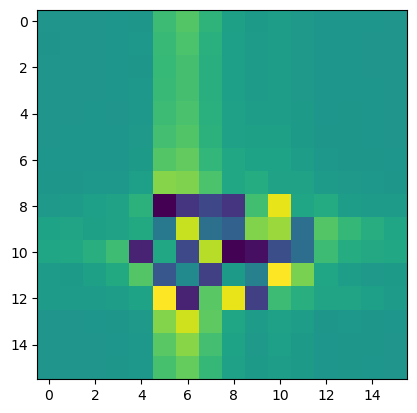

In [8]:
plt.figure()
plt.imshow(np.fliplr(np.flipud(spsp_epi_overflow.dataset['DATA']['r_image']['Abs'][2])))
plt.show()
plt.figure()
plt.imshow(spsp_epi_overflow.dataset['DATA']['2dseq'][2])
plt.show()